<a href="https://colab.research.google.com/github/Neeraj70820/My-Notes/blob/MLT-Notes/MLT_week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

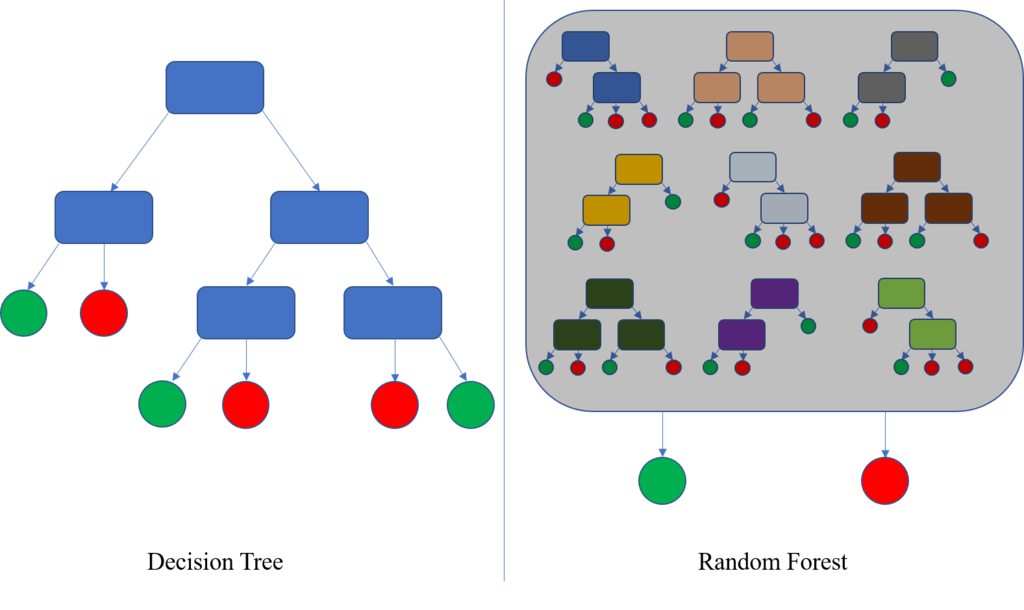

In case of decision tree, we train a single decision tree. In random forest we train multiple decision trees on different training sets obtained through boostrap aggregation.

#Random Forests-The algorithm.
**Input**:

1. The training data $D$ with shape $(n,m)$, say $D_1,D_2,\ldots ,D_q$ with replacement from $D$.
2. In each of the datasets $D_j$, select $u$ out of $m$ where $u \le m$ features before each split and train a full decision tree $h_j(\mathbf x)$
3. The final predictor is
  * For regression, an average output from $q$ regressors is assigned to the new example:
  
  $$ h(\mathbf x) = \frac {1}{q} \sum_{j=1}^q h_j(\mathbf x) $$

  * For classification, a majority voting is taken and the class label with the maximum number of votes is assigned to the new example.


# Implementation

In order to keep the implementation focused to main components of random forest, we make use of `DecisionTreeClassifier` from scikit-learn library for decision tree components

In [ ]:
import numpy as np 
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeClassifier



We will build the code component-wise and finally combine them into a `RandomForest` class.

#Bagging

We define a function for bagging-creating 1 boostrap samples $D_1,D_2,\ldots,D_q$ from the original dataset $D:$
 * The key step is np.random.choice with `size=n_samples` and `replace=True` which ensures that the boostrap sample has the same number of samples as the original dataset and it is obtained by sampling with replacement.
 

In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True,random_state=1)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]

#Majority Voting
Code `up` `most_common_label` function for obtaining majority vote for  class labels.



In [ ]:
def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0] 
  return most_common


y = [1,1,1,0,0,2,2,2,2,3,3,3]
print(Counter(y))
print(Counter(y).most_common(2)[0][0])


Counter({2: 4, 1: 3, 3: 3, 0: 2})
2


#Random forest class

we create `RandomForest` class with the following default parameters:

 * number of tree =10
 * minimum number of samples =2
 * maximum depth =100 

The `max_features` is a configurable parameter that can be set by the user.



In [ ]:
class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees = n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split = min_samples_split # min no of samples required for split
    self.max_depth=max_depth #maximum depth of decision tree
    self.max_features = max_features #maximum no of features to be considered
    self.trees = [] 
    


#Training random forest
we implement `fit` method.

 * Initialize an empty list of decision tree classifiers.
 * In the for loop, we train each decision tree with parameters set from random forest on a boostrapped sample obtained through the `bag` function.

 

In [ ]:
def fit(self,X,y):
  self.trees =[] #Empty array of trees which gets filled in during operations.
  for _ in range(self.n_trees): #we are using underscore we are just repeating the operations.
    tree = DecisionTreeClassifier( #we will now make RF class inherit features from Sklearn'
                                  min_samples_split = self.min_samples_split,
                                  max_depth = self.max_depth,
                                  max_features=self.max_features
                                
        
    )
    X_sample, y_sample = bag(X,y) 
    tree.fit(X_sample,y_sample) 
    self.trees.append(tree) # we will append each of these tree.
    


#Inference
Let's implement `predict` function

Here, we need to note that each of the trees will give predictions for all the individual rows of the input data.

for example if we have random forest with 3 trees and 2 classes 0 & 1, let's assume the prediciton for 5 samples is as follows.

  * Tree 1 gives 11001
  * Tree 2 gives 00111
  * Tree 3 gives 10101

We need to aggregate the output for the respective samples and take an average/majority vote. For this, we will use `np.swapaxes`.



In [ ]:
def predict(self,X):
  tree_predict = np.array([tree.predict(X) for tree in self.trees])
  tree_predict = np.swapaxes(tree_predict,0,1) #each of the trees will give out predictions
  y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict] 
  return np.array(y_pred) 

  

#Cleaned up Code
Combined the different components for creating the class



In [ ]:
import numpy as np
def bag (X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0] 

  #Generates a random sample from the  given input.
  indices = np.random.choice(n_samples,size = n_samples,replace=True)
  # Note that the second argument size has been set to the size of 
  # the original sample dataset and replacement has been set to True

  return X[indices], y[indices]

def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0] 
  return most_common

class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees = n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split = min_samples_split # min no of samples required for split
    self.max_depth=max_depth #maximum depth of decision tree
    self.max_features = max_features #maximum no of features to be considered
    self.trees = [] 
    
  def fit(self,X,y):
    self.trees =[] #Empty array of trees which gets filled in during operations.
    for _ in range(self.n_trees): #we are using underscore we are just repeating the operations.
      tree = DecisionTreeClassifier( #we will now make RF class inherit features from Sklearn'
                                    min_samples_split = self.min_samples_split,
                                    max_depth = self.max_depth,
                                    max_features=self.max_features
                                  
          
      )
      X_sample, y_sample = bag(X,y) 
      tree.fit(X_sample,y_sample) 
      self.trees.append(tree) # we will append each of these tree.

  def predict(self,X):

    tree_predict = np.array([tree.predict(X) for tree in self.trees])
    tree_predict = np.swapaxes(tree_predict,0,1) #each of the trees will give out predictions
    y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict] 
    return np.array(y_pred) 

  
  



Let us demonstrate our implementation of Random Forest on a real world dataset.



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true) 
  return accuracy 

data = datasets.load_breast_cancer()
X = data.data
y = data.target 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1) 

clf = RandomForest(n_trees=10, max_depth=10, max_features = 'sqrt') 

clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test) 
acc = accuracy(y_test, y_pred) 

print("Accuracy:", acc) 


Accuracy: 0.9385964912280702


Let us look at the confusion matrix and classification report on the test set.


In [ ]:
from sklearn.metrics import confusion_matrix 
matrix = confusion_matrix(y_test, y_pred) 
matrix 


array([[36,  6],
       [ 1, 71]])

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred)) 


              precision    recall  f1-score   support

           0       0.97      0.86      0.91        42
           1       0.92      0.99      0.95        72

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



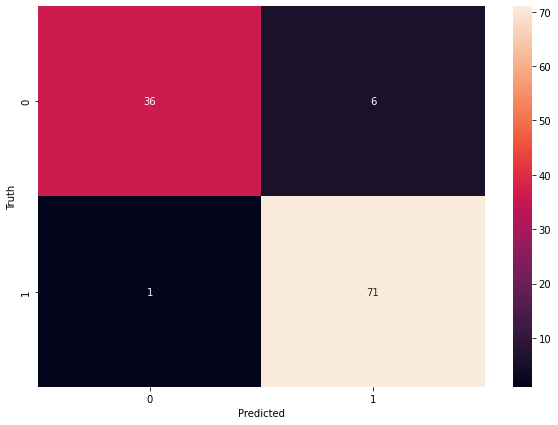

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True) 
plt.xlabel("Predicted") 
plt.ylabel('Truth') 
plt.show()

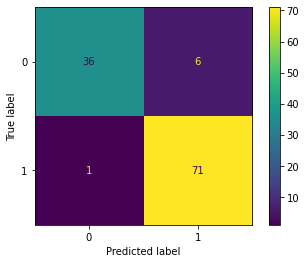

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay 
cm = ConfusionMatrixDisplay
cm.from_predictions(y_test,y_pred)
plt.show()

#Gradient Boost 

The principle behind boosting algorithms is that first we build a model on the training dataset, then a second model is built to rectify the errors present in the first model. This procedure is continued until and unless the errors are minimized, and the dataset is predicted correctly. In particular, we start with a weak model and subsequently, each new model is fit on a modified version of the original dataset.

Notes:
 * A weak learner is a model that performs at least slightly better than a random model.
 * Decision trees are generally used as weak learners in gradient boost.
 * Unlike AdaBoost where decision trees with only one level (decision stumps) are used, The decision trees used in Gradient Boost generally contain some 3-7 levels.

Steps:
In this colab, we implement Gradient Boosting algorithm and show it works for regression. Following are the steps involved:
  1. Make a first guess for y_train and y_test, using the average of y_train.

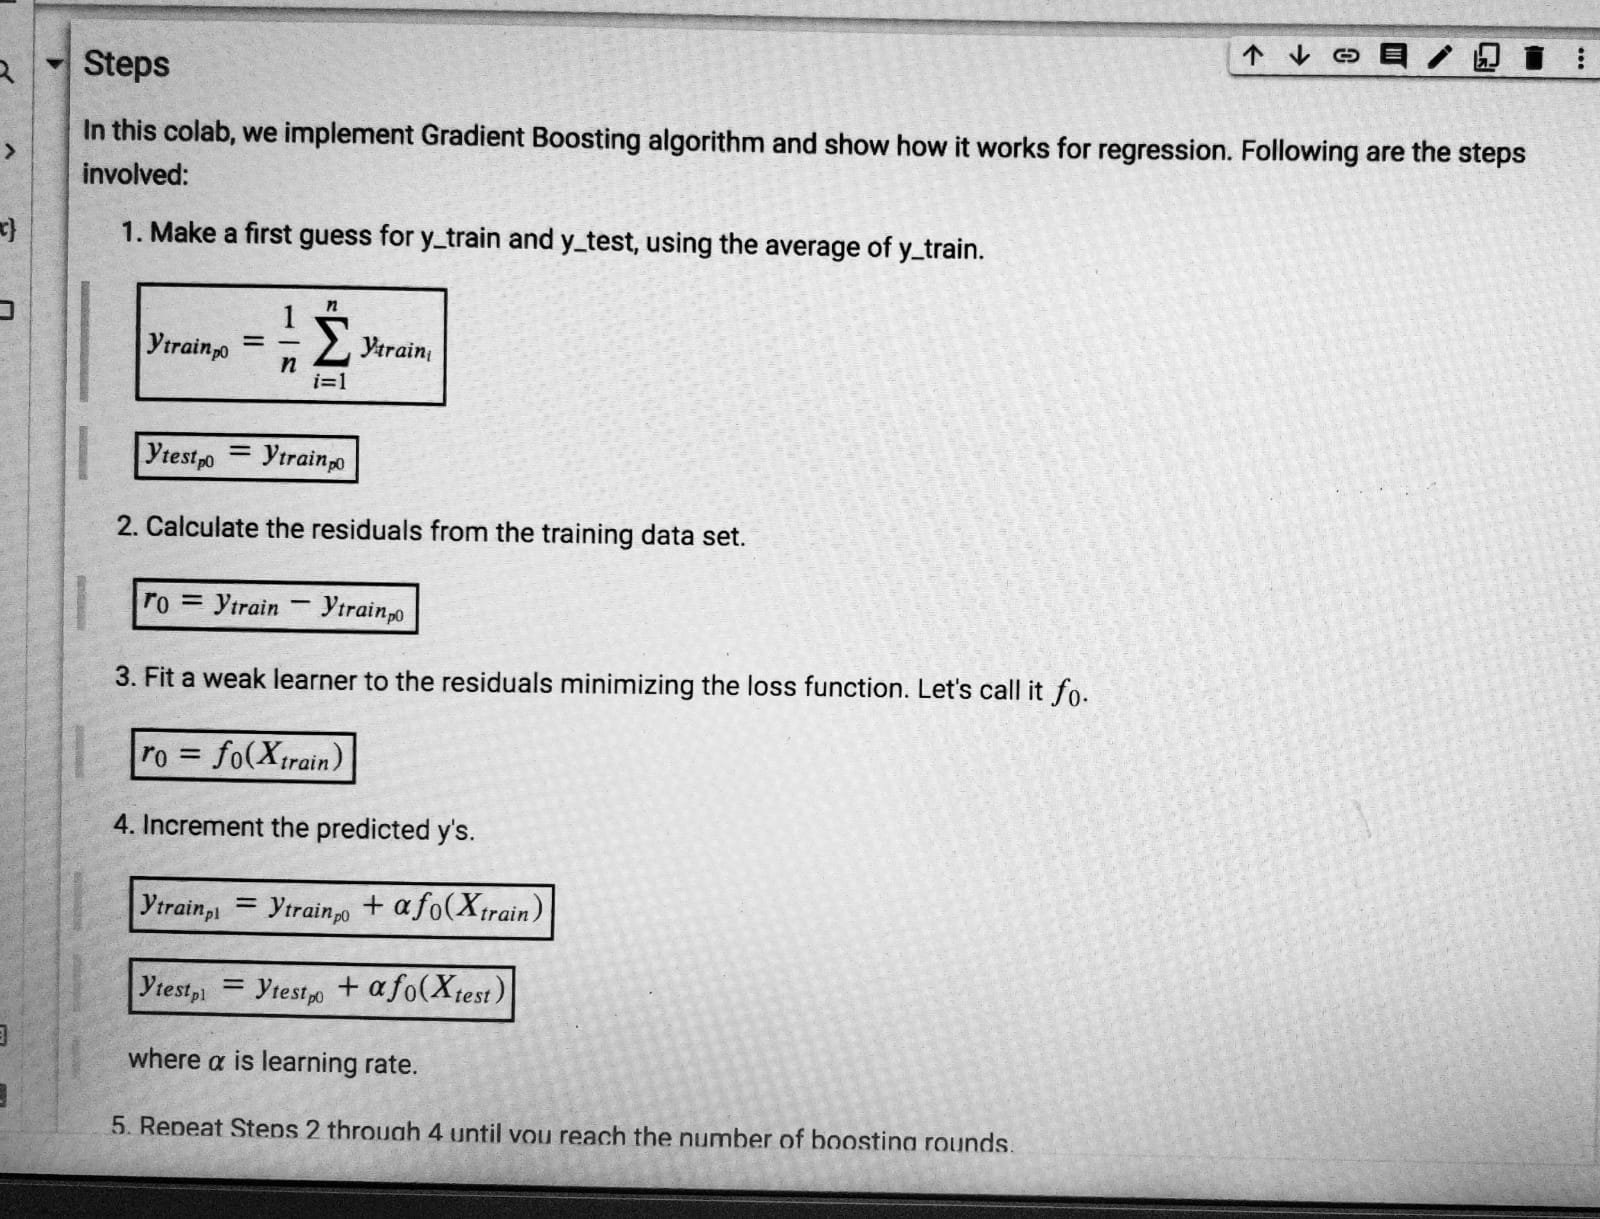





  

In [ ]:
import numpy as np
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns


We will need to run several iterations, so lets create a function to implement GradBoost.


In [ ]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate: float = 0.1):
  # make a first guess of our training target variable using the mean of y_train
  y_hat_train = np.repeat(np.mean(y_train), len(y_train))

  # initialize the test prediction with the mean of the training target variable
  y_hat_test = np.repeat(np.mean(y_train), len(X_test)) 

  #calculate the residuals from the training data using the first guess
  residuals = y_train - y_hat_train 

  #iterates through the boosting round.
  for i in range(0,boosting_rounds):
    #fit the model to the residuals
    model = model.fit(X_train, residuals) 

    #increment the predicted training y with the pseudo residual * learning rate
    y_hat_train = y_hat_train + learning_rate*model.predict(X_train) 

    #increment the predicted test y as well
    y_hat_test = y_hat_test + learning_rate * model.predict(X_test) 

    #calculate the residuals for the next round 

    residuals = y_train - y_hat_train 
  return y_hat_train, y_hat_test


    



We will create a synthetic dataset on which we will apply Gradient Boost.


In [ ]:
from sklearn.datasets import make_regression 


X, y = make_regression(
    n_samples=1000,
    n_features = 20,
    n_informative =15,
    n_targets =1,
    bias = 0.0,
    noise=20,
    shuffle=True,
    random_state=13
)

x_train = X[0:800] 
y_train = y[0:800] 

x_test = X[800:] 
y_test = y[800:] 


The weak learner that we will use in DecisionTreeRegressor with a depth of 3. We can also use other regressors such as linear regression, ridge regression etc.


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor(criterion='squared_error', max_depth=3) 


Let us see how the squared error reduces as we keep increasing the number of boosting rounds.
We will store the errors in a list, and will plot further.


In [ ]:
mse_train = [] 
n_rounds = np.arange(5,101,5) 
for n_round in n_rounds:
  y_hat_train = GradBoost(model, 
                          x_train,
                          y_train,
                          x_test,
                          boosting_rounds=n_round,
                          learning_rate=0.1)[0]   #gradboos returns 2 values so [0] picks first see above code 
  print("round#", n_round) 
  mse_train.append(np.mean((y_train-y_hat_train)**2))                         

round# 5
round# 10
round# 15
round# 20
round# 25
round# 30
round# 35
round# 40
round# 45
round# 50
round# 55
round# 60
round# 65
round# 70
round# 75
round# 80
round# 85
round# 90
round# 95
round# 100


Let's plot the reduction in training error wrt the number of boosting rounds. (we can similarly plot for test_error)

Text(0, 0.5, 'Training Mean Squared Error')

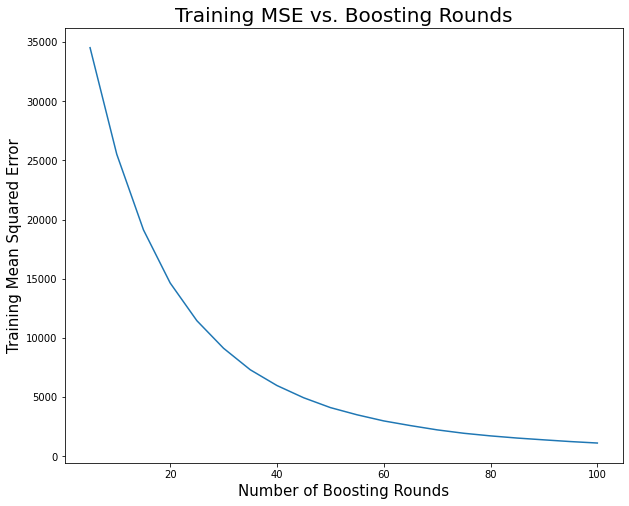

In [ ]:
plt.rcParams['figure.figsize'] = (10,8) 
plt.plot(n_rounds, mse_train) 
plt.title("Training MSE vs. Boosting Rounds", fontsize=20) 
plt.xlabel('Number of Boosting Rounds', fontsize=15) 
plt.ylabel('Training Mean Squared Error',fontsize=15) 


boosting_rounds=0
We can also compare the actual target values with the predicted values for a given boosting_rounds value. Initially, we consider the mean of y_train values as the prediction. Let's plot that.



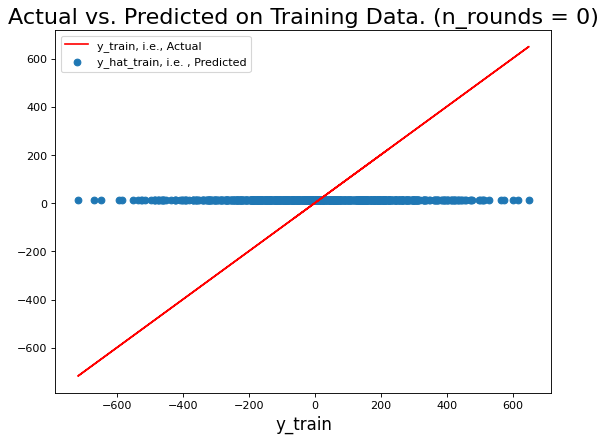

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w', edgecolor='k') 

n_rounds = 0 

y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()

boosting_rounds=10
We can see how the prediction gets better as the number of training rounds is increased to 10.


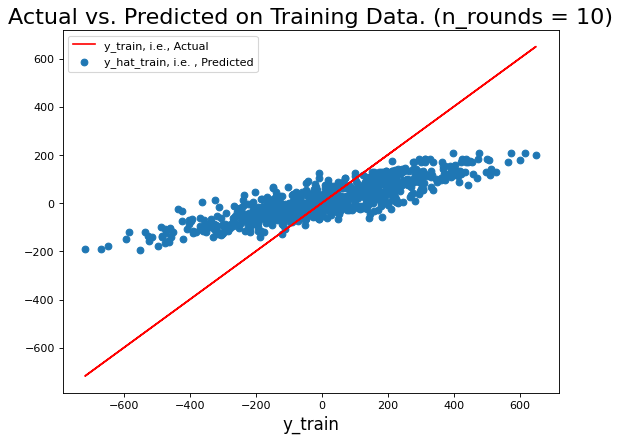

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k' )

n_rounds=10
y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()

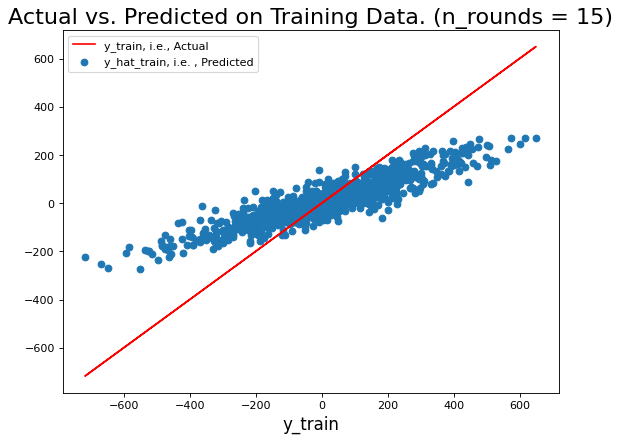

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k' )

n_rounds=15
y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()

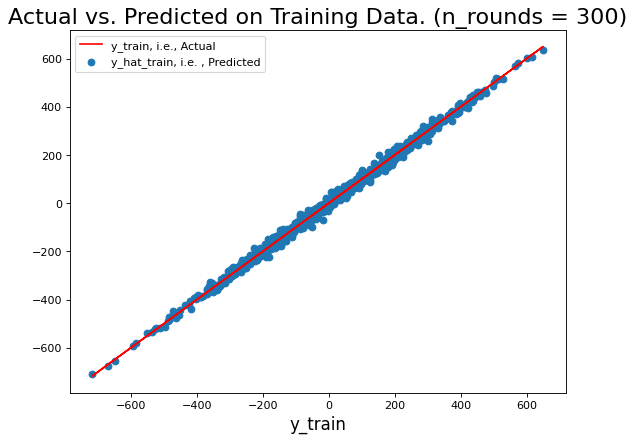

In [ ]:

fig=plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k' )

n_rounds=300
y_hat_train, y_hat_test = GradBoost(model,
                                    x_train,
                                    y_train,
                                    x_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1) 

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e. , Predicted') 
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+
          ')', fontsize=20) 
plt.xlabel('y_train', fontsize=15) 
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual') 
plt.legend()
plt.show()